In [1]:
# Deming Regression
# ----------------------------------
#
# This function shows how to use Tensorflow to
# solve linear Deming regression.
# y = Ax + b
#
# We will use the iris data, specifically:
#  y = Sepal Length
#  x = Petal Width

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [2]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [3]:
# Declare Demming loss function
demming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
demming_denominator = tf.sqrt(tf.add(tf.square(A), 1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.1)
train_step = my_opt.minimize(loss)

Step #50 A = [[-4.05843401]] b = [[ 0.83748478]]
Loss = 2.41081
Step #100 A = [[-5.01120043]] b = [[ 1.9087255]]
Loss = 2.13828
Step #150 A = [[-5.5638938]] b = [[ 2.83618617]]
Loss = 1.67612
Step #200 A = [[-5.90851593]] b = [[ 3.69368792]]
Loss = 1.54155
Step #250 A = [[-6.11218023]] b = [[ 4.51340246]]
Loss = 1.43663


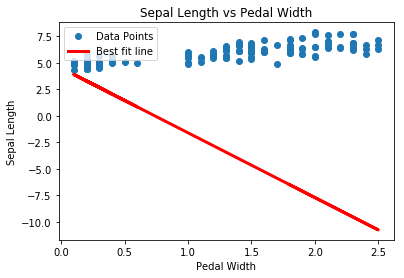

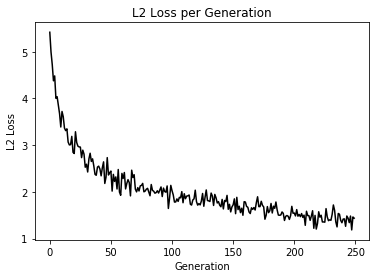

In [4]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
for i in range(250):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i + 1) % 50 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()
